## Classifying data using a Support Vector Machine (SVM)

Reference : https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb

- Built an SVM that wll find the optimal hyperplane that maximizes the margin between 2 toy data classes using Gradient Descent.







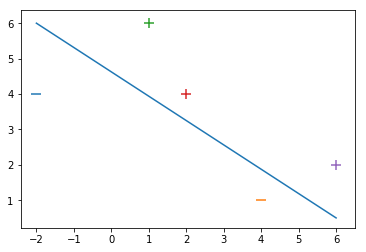

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

######################### 
# Step 1: Define our data
#########################

# Input - X's - form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

# Associated outputs - Y's
# 2 classes : (1,-1)
# First 2 examples are labeled '-1' and last 3 are labeled '+1'
Y = np.array([-1,-1,1,1,1])


################################# 
# Step 2: Plot data on a 2D graph
################################# 

for idx, input in enumerate(X):
    if idx<2: # for -ve points
        plt.scatter(input[0], input[1], s=120, marker='_', linewidths=20)
    else: # for +ve points
        plt.scatter(input[0], input[1], s=120, marker='+', linewidths=20)

        
#############################################################################        
# Step 3. Draw a possible hyperplane, which seperates 2 classes ('-' and '+')
# Naive guess as of now.
############################################################################# 
plt.plot([-2,6],[6,0.5])

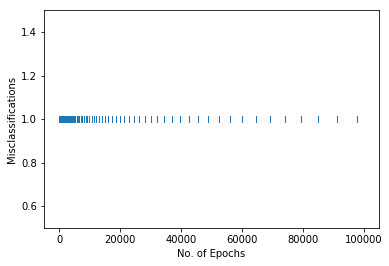

In [2]:
####################################################################
# Step 4. Define stochastic gradient descent to learn the seperating 
#         hyperplane between both classes
####################################################################

def svm_sgd(X, Y):
  # Initialize SVM weight as sized 3 vector with zeroes.
  w = np.zeros(len(X[0]))

  # learning rate
  learning_rate = 1
  # Number of times to iterate
  epochs = 100000

  errors= [] # maintains misclassification to plot it over the time we learn.

  # Training / Gradient Descent part
  for epoch in range(1,epochs):
    error = 0
    for i, x in enumerate(X):
        # mis classification
        if (Y[i] * np.dot(X[i], w)) < 1:
            # wrong classification : Update weights
            w = w + learning_rate * ((X[i] * Y[i]) + (-2 / epoch) * w)
            error = 1
        else:
            # right classification : Update weights
            w = w + learning_rate * (-2 / epoch * w)
    errors.append(error)
  
  # Plotting the rate of classification errors during training of SVM
  plt.plot(errors, '|')
  plt.ylim(0.5, 1.5)
  # plt.axes().set_yticklabels([])
  plt.xlabel('No. of Epochs')
  plt.ylabel('Misclassifications')
  plt.show()

  return w


w = svm_sgd(X,Y)

1.5887611677 3.17458055148 -3.17458055148 1.5887611677
1.5887611677 3.17458055148 3.17458055148 -1.5887611677


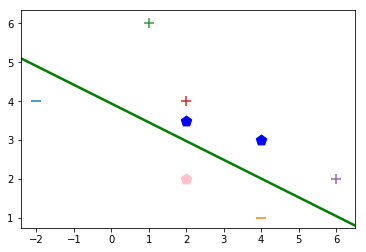

In [3]:
##########################################################
# Step 5. De-draw input points, hyperplane and test points
##########################################################

for idx, input in enumerate(X):
    if idx<2: # for -ve points
        plt.scatter(input[0], input[1], s=120, marker='_', linewidths=1)
    else: # for +ve points
        plt.scatter(input[0], input[1], s=120, marker='+', linewidths=1)

# Add our test samples
plt.scatter(2,2, s=120, marker=(5, 0), linewidths=1, color='pink')
plt.scatter(4,3, s=120, marker=(5, 0), linewidths=1, color='blue')
plt.scatter(2,3.5, s=120, marker=(5, 0), linewidths=1, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]        

print (w[0],w[1], -w[1],w[0])
print (w[0],w[1], w[1],-w[0])
x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='green')